C:\Users\praki\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\praki\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\praki\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\praki\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


5.0


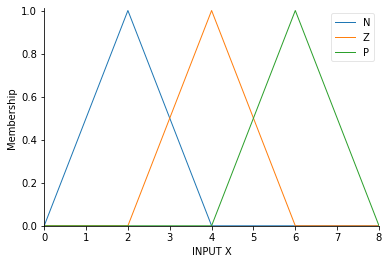

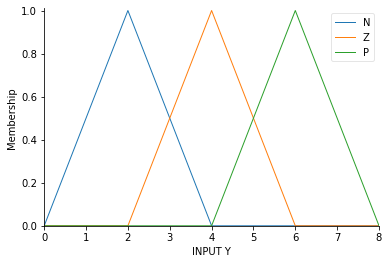

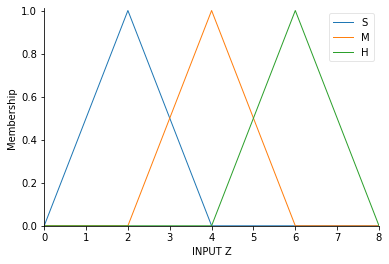

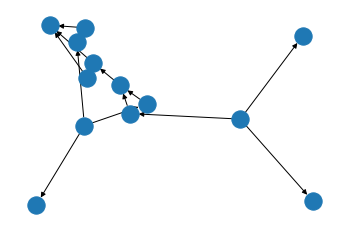

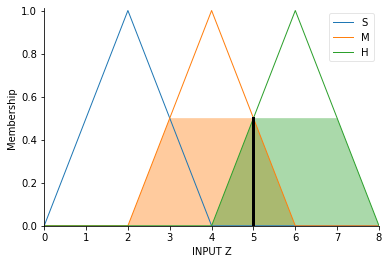

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership
# functions
quality = ctrl.Antecedent(np.arange(0, 9, 1), 'INPUT X')
service = ctrl.Antecedent(np.arange(0, 9, 1), 'INPUT Y')
tip = ctrl.Consequent(np.arange(0, 9, 1), 'INPUT Z')

# Auto-membership function population is possible with .automf(3, 5, or 7)
# quality.automf(3)
# service.automf(3)

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
quality['N'] = fuzz.trimf(tip.universe, [0, 2, 4])
quality['Z'] = fuzz.trimf(tip.universe, [2, 4, 6])
quality['P'] = fuzz.trimf(tip.universe, [4, 6, 8])

service['N'] = fuzz.trimf(tip.universe, [0, 2, 4])
service['Z'] = fuzz.trimf(tip.universe, [2, 4, 6])
service['P'] = fuzz.trimf(tip.universe, [4, 6, 8])

tip['S'] = fuzz.trimf(tip.universe, [0, 2, 4])
tip['M'] = fuzz.trimf(tip.universe, [2, 4, 6])
tip['H'] = fuzz.trimf(tip.universe, [4, 6, 8])
# You can see how these look with .view()
quality.view()
service.view()
tip.view()


rule1 = ctrl.Rule(quality['N'] & service['N'], tip['S'])
rule2 = ctrl.Rule(quality['N'] & service['Z'], tip['M'])
rule3 = ctrl.Rule(quality['N'] & service['P'], tip['M'])

rule4 = ctrl.Rule(quality['Z'] & service['N'], tip['M'])
rule5 = ctrl.Rule(quality['Z'] & service['Z'], tip['H'])
rule6 = ctrl.Rule(quality['Z'] & service['P'], tip['H'])

rule7 = ctrl.Rule(quality['P'] & service['N'], tip['M'])
rule8 = ctrl.Rule(quality['P'] & service['Z'], tip['H'])
rule9 = ctrl.Rule(quality['P'] & service['P'], tip['H'])

rule1.view()
tipping_ctrl = ctrl.ControlSystem(
    [rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
tipping.input['INPUT X'] = 3
tipping.input['INPUT Y'] = 5

# Crunch the numbers
tipping.compute()
print(tipping.output['INPUT Z'])
tip.view(sim=tipping)
